In [ ]:
# ! python -c "import torch; print(torch.__version__)"
# ! export CUDA='1.7.0+cu101'

1.7.0+cu101


In [ ]:
# ! python -c "import torch; print(torch.version.cuda)"
# ! export TORCH='10.1'

10.1


In [ ]:
# ! export TORCH='10.1' && export CUDA='cu101' && pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/torch-${TORCH}+${CUDA}.html

pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/torch-10.1+cu101.html


In [ ]:
# ! export CUDA='1.7.0+cu101' && pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/torch-${CUDA}.html
# ! export CUDA='1.7.0+cu101' && pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/torch-${CUDA}.html
# ! export CUDA='1.7.0+cu101' && pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/torch-${CUDA}.html
# ! export CUDA='1.7.0+cu101' && pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/torch-${CUDA}.html
# ! pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
     |████████████████████████████████| 11.9MB 7.7MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
     |████████████████████████████████| 24.3MB 63.7MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
     |████████████████████████████████| 21.5MB 1.1MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
     |████████████████████████████████| 6.4MB 7.0MB/s 
     |████████████████████████████████| 194kB 8.8MB/s 
     |████████████████████████████████| 235kB 15.7MB/s 
     |████████████████████████████████| 2.2MB 17.0MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-1.6.3-cp36-none-any.whl size=322720 sha256=3a74709d3954a0d3700e0d4c7dbe06902fbe726a0c21db60c6eee56112a0feab
  Stored in directory: /root/.cache/pip/wheels/6d/47/1e/0af8ce3e21783c3e584c22502011a

In [1]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

In [2]:
# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xlabel('TSNE Component 1')
    
    plt.ylabel('TSNE Component 2')
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=50, c=color, cmap="Set2")
#     plt.legend()
    plt.show()

In [3]:
dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7


In [4]:
dataset.data

Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])

In [5]:
dataset.name

'Cora'

In [6]:
dataset.indices()

range(0, 1)

In [7]:
dataset.num_edge_features

0

In [ ]:
dataset.num_features

1433

In [ ]:
dataset.data.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
dataset.data.x.shape

torch.Size([2708, 1433])

In [ ]:
dataset.data.y

tensor([3, 4, 4,  ..., 3, 3, 3])

In [ ]:
dataset.data.y.shape

torch.Size([2708])

In [ ]:
dataset.raw_file_names

['ind.cora.x',
 'ind.cora.tx',
 'ind.cora.allx',
 'ind.cora.y',
 'ind.cora.ty',
 'ind.cora.ally',
 'ind.cora.graph',
 'ind.cora.test.index']

In [ ]:
dataset.collate

<function torch_geometric.data.in_memory_dataset.InMemoryDataset.collate>

In [ ]:
dataset.processed_file_names

'data.pt'

In [4]:
import numpy as np

In [5]:
np.unique(dataset.data.y)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [6]:
data = dataset[0]  # Get the first graph object.

print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


<h2> MLP Performance </h2>

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(MLP, self).__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x


In [ ]:
model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.
print(model)

MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


In [ ]:
def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9615
Epoch: 002, Loss: 1.9557
Epoch: 003, Loss: 1.9505
Epoch: 004, Loss: 1.9423
Epoch: 005, Loss: 1.9327
Epoch: 006, Loss: 1.9279
Epoch: 007, Loss: 1.9144
Epoch: 008, Loss: 1.9087
Epoch: 009, Loss: 1.9023
Epoch: 010, Loss: 1.8893
Epoch: 011, Loss: 1.8776
Epoch: 012, Loss: 1.8594
Epoch: 013, Loss: 1.8457
Epoch: 014, Loss: 1.8365
Epoch: 015, Loss: 1.8280
Epoch: 016, Loss: 1.7965
Epoch: 017, Loss: 1.7984
Epoch: 018, Loss: 1.7832
Epoch: 019, Loss: 1.7495
Epoch: 020, Loss: 1.7441
Epoch: 021, Loss: 1.7188
Epoch: 022, Loss: 1.7124
Epoch: 023, Loss: 1.6785
Epoch: 024, Loss: 1.6660
Epoch: 025, Loss: 1.6119
Epoch: 026, Loss: 1.6236
Epoch: 027, Loss: 1.5827
Epoch: 028, Loss: 1.5784
Epoch: 029, Loss: 1.5524
Epoch: 030, Loss: 1.5020
Epoch: 031, Loss: 1.5065
Epoch: 032, Loss: 1.4742
Epoch: 033, Loss: 1.4581
Epoch: 034, Loss: 1.4246
Epoch: 035, Loss: 1.4131
Epoch: 036, Loss: 1.4112
Epoch: 037, Loss: 1.3923
Epoch: 038, Loss: 1.3055
Epoch: 039, Loss: 1.2982
Epoch: 040, Loss: 1.2543


In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.5900


<h2> Graph Network Training </h2>

In [68]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

In [69]:
model_GCN = GCN(hidden_channels=16)
print(model_GCN)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


In [57]:
init_weight_layer1 = model_GCN.conv1.weight.clone().detach().numpy()
init_weight_layer2 = model_GCN.conv2.weight.clone().detach().numpy()

In [58]:
init_weight_layer1

array([[ 0.06199611,  0.04885456,  0.06333783, ..., -0.03177103,
        -0.03689297, -0.00296421],
       [ 0.02832628,  0.02880533, -0.02395222, ...,  0.02135216,
        -0.05903857,  0.00465199],
       [-0.02419352, -0.00916667, -0.02869522, ..., -0.0396938 ,
        -0.01934615,  0.04924854],
       ...,
       [ 0.04132462,  0.04575555, -0.01401594, ...,  0.03864178,
        -0.06341214, -0.06126413],
       [-0.05903377, -0.02471263,  0.06358125, ..., -0.0430703 ,
        -0.03635427, -0.05508952],
       [ 0.00669769,  0.01700553, -0.04716151, ...,  0.00164028,
        -0.05924653, -0.03858559]], dtype=float32)

In [47]:
type(init_weight_layer1)

torch.nn.parameter.Parameter

In [59]:
init_weight_layer2

array([[ 0.45687228, -0.00665677, -0.196103  ,  0.43521553, -0.41336063,
         0.06999075, -0.02202532],
       [ 0.31854397,  0.03442413, -0.0905368 ,  0.36620235, -0.17809248,
         0.10463965, -0.4651401 ],
       [-0.5043023 ,  0.15009832,  0.41756958, -0.0647738 , -0.06457457,
        -0.40157384,  0.26955235],
       [-0.2059192 ,  0.4090696 ,  0.15124744, -0.30604666,  0.28101343,
         0.31519967,  0.09480172],
       [ 0.26216835,  0.39734858,  0.01789767, -0.32360134, -0.07797053,
         0.27792346,  0.3158869 ],
       [-0.34879774, -0.04851323, -0.2559197 , -0.3841234 ,  0.13746327,
         0.39626497, -0.18433258],
       [-0.2949407 ,  0.3162129 ,  0.38874465,  0.05042136,  0.49620205,
        -0.36840552,  0.33081144],
       [ 0.14044982, -0.39398235, -0.08730543,  0.44797617,  0.43453634,
        -0.20034349, -0.1073291 ],
       [-0.45533   , -0.31761616,  0.46369994, -0.14194185, -0.12580118,
         0.33855522,  0.09391564],
       [ 0.29043472,  0.0874

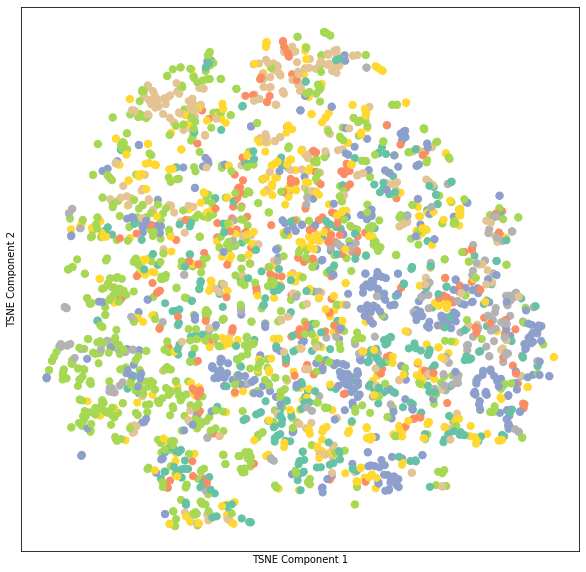

In [12]:
model_GCN.eval()

out = model_GCN(data.x, data.edge_index)
visualize(out, color=data.y)

In [70]:
# model_GCN = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model_GCN.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

In [71]:
def train():
      model_GCN.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model_GCN(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model_GCN.eval()
      out = model_GCN(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

In [72]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))
max_epoch = 201

for epoch in range(1, max_epoch):
    
    if epoch == 1:
      diff = model_GCN.conv1.weight.clone().detach().numpy()
      n = 0;
      M2 = 0;
    elif epoch < max_epoch-1:
      currentWeights = model_GCN.conv1.weight.clone().detach().numpy()
  
      n += 1
      delta = np.subtract(currentWeights, diff)
      diff += delta/n
      delta2 = np.subtract(currentWeights, diff)
      M2 += delta*delta2

      lastweights = model_GCN.conv1.weight.clone().detach().numpy()
    else:
      if n<2:
        s2 = float('nan')
      else:
        s2 = M2/(n-1)

        scores = np.sum(np.multiply(s2, np.abs(lastweights)), axis = 1)

        varScores = (scores - min(scores)) / (max(scores) - min(scores))

        print(np.array(varScores).argsort()[-10:][::-1])    
    
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9451
Epoch: 002, Loss: 1.9384
Epoch: 003, Loss: 1.9307
Epoch: 004, Loss: 1.9227
Epoch: 005, Loss: 1.9126
Epoch: 006, Loss: 1.9076
Epoch: 007, Loss: 1.8917
Epoch: 008, Loss: 1.8809
Epoch: 009, Loss: 1.8728
Epoch: 010, Loss: 1.8616
Epoch: 011, Loss: 1.8453
Epoch: 012, Loss: 1.8397
Epoch: 013, Loss: 1.8237
Epoch: 014, Loss: 1.8057
Epoch: 015, Loss: 1.7979
Epoch: 016, Loss: 1.7808
Epoch: 017, Loss: 1.7667
Epoch: 018, Loss: 1.7555
Epoch: 019, Loss: 1.7436
Epoch: 020, Loss: 1.7184
Epoch: 021, Loss: 1.7126
Epoch: 022, Loss: 1.6845
Epoch: 023, Loss: 1.6717
Epoch: 024, Loss: 1.6673
Epoch: 025, Loss: 1.6353
Epoch: 026, Loss: 1.6181
Epoch: 027, Loss: 1.5962
Epoch: 028, Loss: 1.5723
Epoch: 029, Loss: 1.5708
Epoch: 030, Loss: 1.5370
Epoch: 031, Loss: 1.5162
Epoch: 032, Loss: 1.4948
Epoch: 033, Loss: 1.4713
Epoch: 034, Loss: 1.4589
Epoch: 035, Loss: 1.4479
Epoch: 036, Loss: 1.4377
Epoch: 037, Loss: 1.4271
Epoch: 038, Loss: 1.3644
Epoch: 039, Loss: 1.3658
Epoch: 040, Loss: 1.3363


In [73]:
varScores

array([3.3352433e-05, 6.6570640e-03, 1.9427373e-03, ..., 4.6347239e-04,
       4.8552402e-03, 1.7784328e-03], dtype=float32)

In [26]:
s2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8140


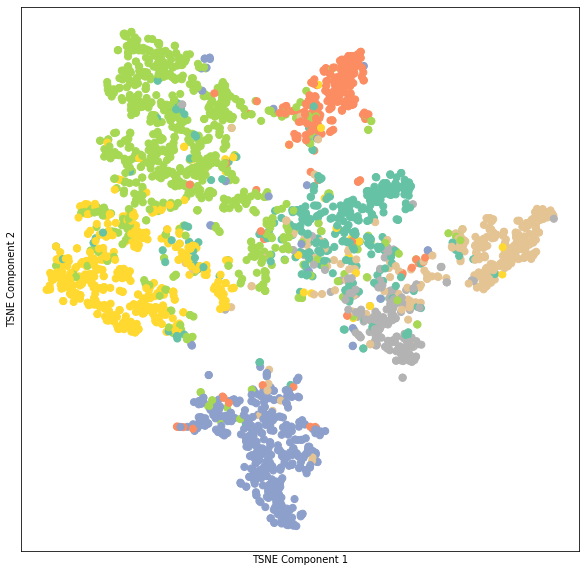

In [20]:
model_GCN.eval()

out = model_GCN(data.x, data.edge_index)
visualize(out, color=data.y)

In [20]:
dir(model.conv1.weight)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rfloordiv__',
 '__rmul__',
 '__rpow__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__

In [63]:
final_weight_layer1 = model_GCN.conv1.weight

In [64]:
init_weight_layer1

array([[ 0.06199611,  0.04885456,  0.06333783, ..., -0.03177103,
        -0.03689297, -0.00296421],
       [ 0.02832628,  0.02880533, -0.02395222, ...,  0.02135216,
        -0.05903857,  0.00465199],
       [-0.02419352, -0.00916667, -0.02869522, ..., -0.0396938 ,
        -0.01934615,  0.04924854],
       ...,
       [ 0.04132462,  0.04575555, -0.01401594, ...,  0.03864178,
        -0.06341214, -0.06126413],
       [-0.05903377, -0.02471263,  0.06358125, ..., -0.0430703 ,
        -0.03635427, -0.05508952],
       [ 0.00669769,  0.01700553, -0.04716151, ...,  0.00164028,
        -0.05924653, -0.03858559]], dtype=float32)

In [65]:
final_weight_layer1

Parameter containing:
tensor([[ 0.0487,  0.0450,  0.0191,  ..., -0.0058,  0.0116, -0.0171],
        [ 0.1589,  0.0677,  0.1780,  ...,  0.0154, -0.2488, -0.0279],
        [-0.0372,  0.1097,  0.0997,  ...,  0.0077,  0.1666, -0.2934],
        ...,
        [ 0.0876,  0.0981, -0.0254,  ..., -0.0465, -0.1163,  0.0145],
        [-0.0647,  0.1010, -0.2289,  ...,  0.2570, -0.0310, -0.0914],
        [ 0.1845,  0.1874, -0.0351,  ..., -0.1426, -0.1331,  0.1632]],
       requires_grad=True)

In [17]:
final_weight_layer1.shape

torch.Size([1433, 16])

In [44]:
init_weight_layer2

Parameter containing:
tensor([[ 1.7602e+00,  1.5394e+00, -1.8163e+00,  1.8851e+00, -1.9992e+00,
         -1.7586e+00, -2.1959e-01],
        [ 1.7799e+00,  1.6968e+00, -1.5261e+00,  1.8430e+00, -1.9237e+00,
         -1.1335e+00, -1.9066e+00],
        [-1.9681e+00,  1.6973e+00,  1.8620e+00, -1.1738e+00, -1.6057e+00,
         -2.0751e+00,  1.7272e+00],
        [-5.6569e-06,  5.2869e-06, -4.1294e-06,  1.0372e-05,  4.7655e-06,
         -1.1721e-05,  1.1144e-06],
        [ 1.6957e+00,  1.6719e+00, -1.7739e+00, -1.8606e+00, -1.4338e+00,
          1.4430e+00,  1.9715e+00],
        [-1.6629e+00,  1.5361e+00, -1.9008e+00, -2.0817e+00,  1.8144e+00,
          1.9193e+00, -1.8439e+00],
        [-1.7967e+00,  1.7463e+00,  1.7788e+00, -1.8893e+00,  2.0796e+00,
         -2.0483e+00,  1.5385e+00],
        [ 1.4633e+00, -2.0221e+00, -1.5362e+00,  1.8190e+00,  1.9151e+00,
         -1.7087e+00, -7.7180e-01],
        [-1.9701e+00, -2.0300e+00,  1.9553e+00, -1.2070e+00, -1.4944e+00,
          1.9274e+00,  1

In [35]:
model_GCN.conv2.weight

Parameter containing:
tensor([[ 1.7602e+00,  1.5394e+00, -1.8163e+00,  1.8851e+00, -1.9992e+00,
         -1.7586e+00, -2.1959e-01],
        [ 1.7799e+00,  1.6968e+00, -1.5261e+00,  1.8430e+00, -1.9237e+00,
         -1.1335e+00, -1.9066e+00],
        [-1.9681e+00,  1.6973e+00,  1.8620e+00, -1.1738e+00, -1.6057e+00,
         -2.0751e+00,  1.7272e+00],
        [-5.6569e-06,  5.2869e-06, -4.1294e-06,  1.0372e-05,  4.7655e-06,
         -1.1721e-05,  1.1144e-06],
        [ 1.6957e+00,  1.6719e+00, -1.7739e+00, -1.8606e+00, -1.4338e+00,
          1.4430e+00,  1.9715e+00],
        [-1.6629e+00,  1.5361e+00, -1.9008e+00, -2.0817e+00,  1.8144e+00,
          1.9193e+00, -1.8439e+00],
        [-1.7967e+00,  1.7463e+00,  1.7788e+00, -1.8893e+00,  2.0796e+00,
         -2.0483e+00,  1.5385e+00],
        [ 1.4633e+00, -2.0221e+00, -1.5362e+00,  1.8190e+00,  1.9151e+00,
         -1.7087e+00, -7.7180e-01],
        [-1.9701e+00, -2.0300e+00,  1.9553e+00, -1.2070e+00, -1.4944e+00,
          1.9274e+00,  1

In [23]:
model_GCN.conv2.weight.shape

torch.Size([16, 7])

In [19]:
init_weight_layer1 - final_weight_layer1

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<SubBackward0>)